In [44]:
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from cv2 import imread,resize
import cv2
import numpy as np
from pandas import DataFrame
import os
import time
%matplotlib inline

In [45]:
temp_array = os.listdir("templates//")
temps = {a.replace('.png',''):resize(imread('templates//{}'.format(a),0),(80,80)) for a in temp_array}

In [46]:
Temps = [[i] for i in temps]
for i in range(len(Temps)):
    Temps[i] = Temps[i]+temps[Temps[i][0]].reshape(1,6400).tolist()[0]

In [47]:

df = DataFrame(Temps,columns=['face']+list(range(6400)))

In [48]:
temp_array_old = os.listdir("templates//")
temps_old = {a.replace('.png',''):cv2.imread('templates//{}'.format(a),0) for a in temp_array_old}
obama = temps_old['obama']
def detect(img):
    for t in temps_old:
        w,h = temps[t].shape[::-1]
        res = cv2.matchTemplate(obama,temps_old[t],cv2.TM_CCOEFF_NORMED)
        thres = 0.7
        loc = np.where(res>=thres)
        
t = time.time()
detect(obama)
temp_matching_time = (time.time()-t)

In [49]:
score_matrix = []
obama = df
def score_classifier(clf,x,y):
    model = clf()
    model.fit(x,y)
    t = time.time()
    model.predict(df.loc[1][1:].values.reshape(1,-1))
    time_pred = time.time() - t
    score_matrix.append([str(clf).split(".")[-1].replace("\'","").replace(">",""),model,model.score(x,y),time_pred])

In [50]:
clfs = [SVC,LinearSVC,NuSVC,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,DecisionTreeClassifier,LogisticRegression,KNeighborsClassifier,GaussianNB]

In [51]:
x,y = df.drop(columns=['face']),df.face
for clf in clfs:
    score_classifier(clf,x,y)

c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

In [55]:
score_matrix.append(['Template Matching',detect,0.5-1,temp_matching_time])
score_df = DataFrame(score_matrix,columns=['Name','Model','Score','Time']).sort_values(by='Time')

In [56]:
score_df['RelativeTime'] = score_df.Time/score_df.Time.values.tolist()[-1]

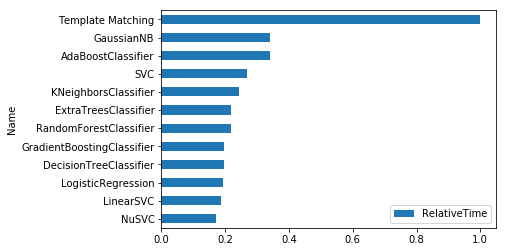

In [57]:
score_df.plot.barh(x='Name',y='RelativeTime')

### Generalized Face Training.

In [43]:
import numpy as np
import cv2
import os
global l

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def saveTemplate(img,name):
    roi = []
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w-10,y+h-10),(255,0,0),2)
        roi_gray = gray[y:y+h-5, x:x+w-5]
        roi.append(roi_gray)
        
    for a in roi:
        file = os.path.join(os.getcwd(),"templates\\{}.png".format(name))
        cv2.imwrite(file,a)
            
face_temps = os.listdir("faces//")
faces = {}
for face in face_temps:
    img = cv2.imread('faces//{}'.format(face))
    name = " ".join([i for i in face.split(".") if i not in ['jpg','png','jpeg']])
    faces.update({name:img})

for face in faces:
    saveTemplate(faces[face],face)